# Fatal Police Shootings in the US #

## Introduction

In the years 2015,2016, and 2017 there were 2945 people involved in a fatal police shooting in the United states according to [The Washington Post](https://www.washingtonpost.com/graphics/national/police-shootings/).  
Where we have 995 people killed in 2015, 963 people killed in 2016, and 987 people killed in 2017. As we can see from those numbers there is little change from years in police fatal shootings.  
We will dive deeper into this, and try to answer the question in which city it is best to live in to avoid fatality from police shootings, by using the dataset about fatal police shootings from kaggle [fatal police shootings in the us](https://www.kaggle.com/kwullum/fatal-police-shootings-in-the-us/version/1).


#### Import the necessary libraries

In [75]:
# Necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [30]:
# Read the datasets
shootings_df = pd.read_csv('resources/PoliceKillingsUS.csv',encoding="windows-1252",parse_dates=[2])
medianIncome_df = pd.read_csv('resources/MedianHouseholdIncome2015.csv',encoding="windows-1252")
povertyLevel_df = pd.read_csv('resources/PercentagePeopleBelowPovertyLevel.csv',encoding="windows-1252")
completedHighschool_df = pd.read_csv('resources/PercentOver25CompletedHighSchool.csv',encoding="windows-1252")
raceByCity_df = pd.read_csv('resources/ShareRaceByCity.csv',encoding="windows-1252")

shootings_df.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


## Data cleaning

in the police-shootings file, we have attributes that are not relevant to us, when visualating the data:
* we have the name of the person killed,
* we also have some id

so we will start by removing those columns

In [32]:
shootings_df = shootings_df.drop(['id','name'], axis=1)
shootings_df.head(10)

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,2015-02-01,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,2015-02-01,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,2015-03-01,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,2015-04-01,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,2015-04-01,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,2015-04-01,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,2015-05-01,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,2015-06-01,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,2015-06-01,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,2015-06-01,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


### Visulation of police shootings sorted by races 

In [42]:
def raceLabelToRace(raceLabel):
    if(raceLabel == 'W'):
        return 'White'
    if(raceLabel == 'B'):
        return 'Black'
    if(raceLabel == 'N'):
        return 'Native American'
    if(raceLabel == 'A'):
        return 'Asian'
    if(raceLabel == 'H'):
        return 'Hispanic'
    else:
        return 'Other'

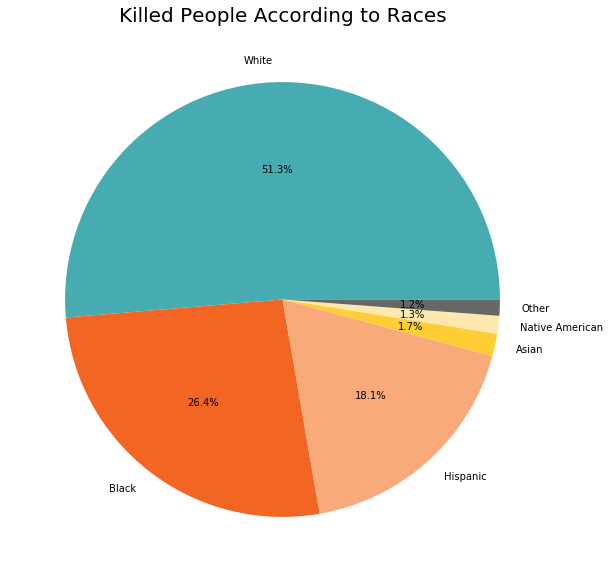

In [59]:
# Race rates  

shootings_df['race'].dropna(inplace = True)
labels = shootings_df['race'].value_counts().index
# Change the labels we have to words, for easier reading
labels = [raceLabelToRace(x) for x in labels]
colors = ['#47ACB1', '#F26522', '#F9AA7B', '#FFCD34','#FFE8AF','#676766']
values = shootings_df['race'].value_counts().values

# Plotting the pie chart
plt.figure(figsize = (10, 10))
plt.pie(values, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Killed People According to Races', color = 'black', size = 20)
plt.show()

In [63]:
weapon = shootings_df['armed'].value_counts()
print(weapon)

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
toy weapon                           104
unknown weapon                        18
machete                               18
Taser                                  9
ax                                     9
baseball bat                           8
sword                                  8
box cutter                             7
hammer                                 7
metal pipe                             7
hatchet                                6
crossbow                               6
screwdriver                            5
blunt object                           5
gun and knife                          5
scissors                               3
guns and explosives                    3
metal stick                            3
rock                                   3
hatchet and gun 

* Mental_ilness vs threat_level vs armed